# **INTRODUÇÃO**

📊 **Análise Exploratória de Dados (EDA) — Acidentes em Rodovias Federais (PRF - 2014 a 2024 - 10 anos de análise)**

**Resumo:** Este notebook apresenta uma EDA de acidentes em rodovias federais brasileiras, com base nas informações divulgadas pela Polícia Rodoviária Federal (PRF) referentes aos anos de 2014 a 2024.

**Objetivo:** Identificar padrões, comportamentos e possíveis fatores de risco relacionados aos acidentes, a fim de gerar insights que possam contribuir para a prevenção e segurança viária.



Fonte dos dados: Polícia Rodoviária Federal

https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf



# **IMPORTAR BIBLIOTECAS**

In [ ]:
### Mapeando bibliotecas necessárias para o projeto
# https://pandas.pydata.org/docs/user_guide/index.html
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os

# **FUNÇÕES**

In [ ]:
def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido,
    mantendo a ordem original das colunas.
    """

    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes.values,
        'qt_nulos': dataframe.isnull().sum().values,
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe)) * 100, 2).values,
        'cardinalidade': dataframe.nunique().values,
    })

    # Não reordena as colunas
    metadata = metadata.reset_index(drop=True)

    return metadata

# Testando a função com o dataframe df_total
metadata_df = generate_metadata(df_total)
metadata_df

In [ ]:
def plot_categorical_frequency_pt(df, corte_cardinalidade=30, graficos_por_linha=2):
    """
    Plota a frequência de categorias para variáveis categóricas em um DataFrame.

    Parâmetros:
    - df: DataFrame para plotagem.
    - corte_cardinalidade: Cardinalidade máxima para uma coluna ser considerada (padrão é 30).
    - graficos_por_linha: Quantidade de gráficos por linha (padrão é 3).

    Retorna:
    - Exibe os gráficos de barras.
    """

    # Gera metadados para o DataFrame
    metadados = []
    for coluna in df_total.columns:
        metadados.append({
            'Variável': coluna,
            'Tipo': df[coluna].dtype,
            'Cardinalidade': df[coluna].nunique()
        })

    df_metadados = pd.DataFrame(metadados)

    # Filtra colunas com cardinalidade maior que o corte e tipos não numéricos
    variaveis_categoricas = df_metadados[(df_metadados['Cardinalidade'] <= corte_cardinalidade) & (df_metadados['Tipo'] == 'object')]

    # Calcula o número de linhas e colunas para os subplots
    n_linhas = -(-len(variaveis_categoricas) // graficos_por_linha)  # Ceiling division
    n_colunas = min(len(variaveis_categoricas), graficos_por_linha)

    # Plota as variáveis categóricas
    fig, axs = plt.subplots(nrows=n_linhas, ncols=n_colunas, figsize=(15, 5 * n_linhas))

    for i, (idx, linha) in enumerate(variaveis_categoricas.iterrows()):
        var = linha['Variável']
        ax = axs[i // graficos_por_linha, i % graficos_por_linha]
        df_total[var].value_counts(dropna=True).plot(kind='bar', ax=ax, color='lightgreen')
        ax.set_title(f'Frequência em {var}')
        ax.set_ylabel('Frequência')
        ax.set_xlabel(var)

    # Remove os eixos vazios, se houver
    for j in range(i + 1, n_linhas * n_colunas):
        axs[j // graficos_por_linha, j % graficos_por_linha].axis('off')

    plt.tight_layout()
    plt.show()

# Testa a função com os dados e o corte padrão de cardinalidade
plot_categorical_frequency_pt(df_total, corte_cardinalidade=30, graficos_por_linha=2)

In [ ]:
def box_plot(dataframe):
    """
    Plota boxplots estilizados com título simplificado para todas as variáveis numéricas do dataframe fornecido
    em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os boxplots serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=5)

    # Configura estilo e paleta de cores
    sns.set_style("white")

    # Plota boxplots para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.boxplot(data=dataframe[column], ax=axes[i//3, i%3], color="lightgreen")
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - BoxPlot", fontsize=20, fontweight='bold', y=1.05)

# Plotando os boxplots estilizados com títulos simplificados usando a função definida
box_plot(df_total)

# **LER ARQUIVOS / UNIR DATAFRAMES**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Caminho da pasta onde estão os arquivos
caminho_pasta = '/content/drive/MyDrive/PodAcademy/fundamentos_analise_de_dados'

# Lista todos os arquivos CSV da pasta
lista_arquivos = glob.glob(os.path.join(caminho_pasta, '*.csv'))

# Lê todos os arquivos e concatena em um único DataFrame
df_total = pd.concat([pd.read_csv(arquivo, sep=';', encoding='latin1') for arquivo in lista_arquivos], ignore_index=True)

# mostra todas as colunas
pd.set_option('display.max_columns', None)

##**Visualização do dataframe**

In [ ]:
# visualizar as primeiras linhas da tabela

df_total.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,ano,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,1175.0,2014-11-22,Sábado,19:20:00,BA,116,778.1,PLANALTO,Ingestão de álcool,Atropelamento de pessoa,(null),Plena noite,Decrescente,Nevoeiro/neblina,Simples,Reta,Urbano,2014.0,2,0,0,1,1,0,1,1,NaN,NaN,NaN,NaN,NaN
1,12.0,2014-11-22,Sábado,08:30:00,SP,116,212.0,GUARULHOS,Outras,Colisão com objeto fixo,(null),Pleno dia,Crescente,Sol,Múltipla,Reta,Urbano,2014.0,1,0,0,0,0,1,0,1,NaN,NaN,NaN,NaN,NaN
2,13.0,2014-11-20,Quinta,09:30:00,BA,367,31.6,PORTO SEGURO,Outras,Saída de Pista,(null),Pleno dia,Crescente,Nublado,Simples,Reta,Rural,2014.0,1,0,1,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN
3,14.0,2014-11-09,Domingo,22:50:00,SC,101,220.9,PALHOCA,Falta de atenção,Colisão com objeto fixo,(null),Plena noite,Decrescente,Ceu Claro,Dupla,Reta,Urbano,2014.0,1,0,1,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN
4,15.0,2014-11-19,Quarta,05:00:00,RJ,116,211.0,SEROPEDICA,Outras,Atropelamento de pessoa,(null),Amanhecer,Crescente,Ceu Claro,Dupla,Reta,Urbano,2014.0,1,0,0,0,1,0,0,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
# visualizar as últimas linhas da tabela

df_total.tail()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,ano,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
947858,661295.0,2024-12-21,sábado,07:00:00,PB,230,"135,2",CAMPINA GRANDE,Ausência de reação do condutor,Saída de leito carroçável,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Dupla,Curva,Não,NaN,1,0,1,0,0,0,1,1,-7.282103,-35.768394,SPRF-PB,DEL02-PB,UOP01-DEL02-PB
947859,661307.0,2024-12-01,domingo,06:30:00,RJ,393,298,VOLTA REDONDA,Ausência de reação do condutor,Colisão frontal,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Simples,Curva,Não,NaN,2,0,2,0,0,0,2,2,-22.543133,-44.112986,SPRF-RJ,DEL07-RJ,UOP02-DEL07-RJ
947860,661377.0,2024-07-09,terça-feira,16:20:00,ES,101,"101,5",SOORETAMA,Desrespeitar a preferência no cruzamento,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Interseção de Vias,Não,NaN,3,0,3,0,0,0,3,2,-18.988339,-39.999335,SPRF-ES,DEL04-ES,UOP02-DEL04-ES
947861,661576.0,2024-12-17,terça-feira,21:35:00,RJ,101,391,RIO DE JANEIRO,Frear bruscamente,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Céu Claro,Dupla,Reta,Não,NaN,2,0,1,0,1,0,1,2,-22.894827,-43.68492,SPRF-RJ,DEL03-RJ,UOP01-DEL03-RJ
947862,661598.0,2024-12-27,sexta-feira,13:00:00,ES,101,67,SAO MATEUS,Conversão proibida,Colisão transversal,Com Vítimas Feridas,Pleno dia,Crescente,Sol,Simples,Reta,Não,NaN,4,0,1,2,0,1,3,3,-18.72054,-39.865893,SPRF-ES,DEL04-ES,UOP02-DEL04-ES


In [ ]:
# verificar as colunas (variáveis) do df:

df_total.columns.tolist()

['id',
 'data_inversa',
 'dia_semana',
 'horario',
 'uf',
 'br',
 'km',
 'municipio',
 'causa_acidente',
 'tipo_acidente',
 'classificacao_acidente',
 'fase_dia',
 'sentido_via',
 'condicao_metereologica',
 'tipo_pista',
 'tracado_via',
 'uso_solo',
 'ano',
 'pessoas',
 'mortos',
 'feridos_leves',
 'feridos_graves',
 'ilesos',
 'ignorados',
 'feridos',
 'veiculos',
 'latitude',
 'longitude',
 'regional',
 'delegacia',
 'uop']

In [ ]:
# verificando os tipos dos dados

df_total.dtypes

,0
id,float64
data_inversa,object
dia_semana,object
horario,object
uf,object
br,int64
km,object
municipio,object
causa_acidente,object
tipo_acidente,object


# **METADADOS**

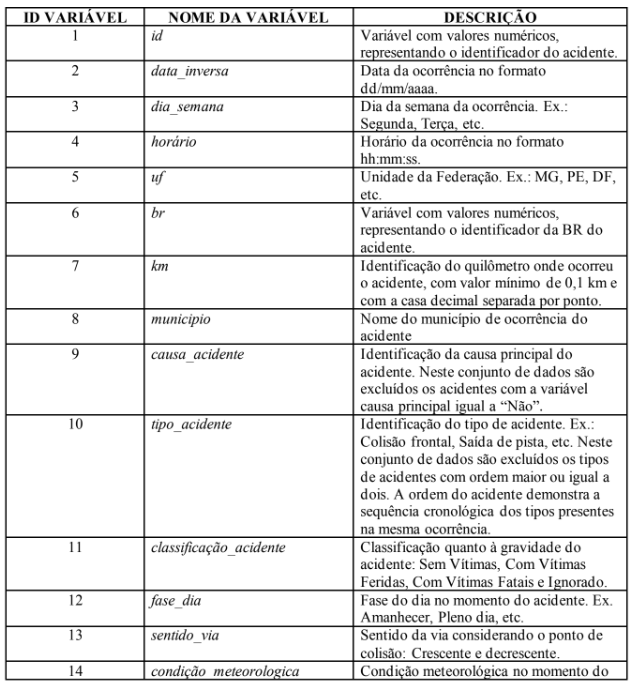

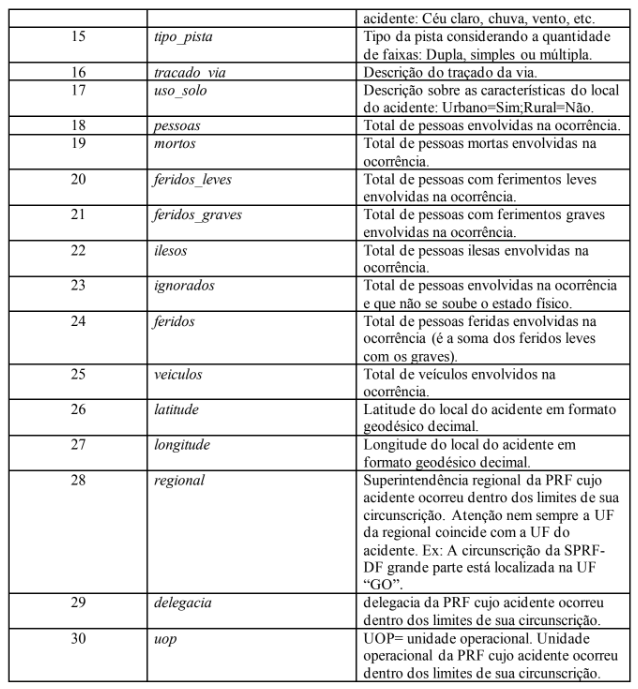

In [ ]:
# carregando metadados

from IPython.display import Image

display(Image('/content/drive/MyDrive/PodAcademy/fundamentos_analise_de_dados/metadados1.PNG'))
display(Image('/content/drive/MyDrive/PodAcademy/fundamentos_analise_de_dados/metadados2.PNG'))

In [ ]:
# criando função para gerar um dataframe de metadados

def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido,
    mantendo a ordem original das colunas.
    """

    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes.values,
        'qt_nulos': dataframe.isnull().sum().values,
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe)) * 100, 2).values,
        'cardinalidade': dataframe.nunique().values,
    })

    # Não reordena as colunas
    metadata = metadata.reset_index(drop=True)

    return metadata

# Testando a função com o dataframe df_total
metadata_df = generate_metadata(df_total)
metadata_df

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,id,float64,0,0.00,947844
1,data_inversa,object,0,0.00,4018
2,dia_semana,object,0,0.00,14
3,horario,object,0,0.00,1456
4,uf,object,0,0.00,27
5,br,int64,0,0.00,146
6,km,object,0,0.00,19181
7,municipio,object,0,0.00,2219
8,causa_acidente,object,0,0.00,100
9,tipo_acidente,object,41,0.00,31


##**Análise**

Verifica-se uma **pequena quantidade de valores nulos** nas variáveis tipo_acidente e classificacao_acidente, indicando que provavelmente não foram preenchidos corretamente no momento do registro do dado.

Outras variáveis como latitude, longitude, regional, delegacia e uop tem uma **significativa quantidade de nulos**; observando o início e o final do Dataframe, percebe-se que essas variáveis não eram preenchidas nos primeiros anos do intervalo e depois começaram a ser, portanto os campos vazios tornaram-se nulos.
Neste mesmo contexto, a variável ano era preenchida nos primeiros anos de intervalo, depois não foi mais, portanto os campos vazios tornaram-se nulos.

In [ ]:
# excluindo a coluna "ano" porque já existe uma coluna que tem a mesma informação (data_inversa)

df_total = df_total.drop(columns=['ano'])

In [ ]:
# quantidade de linhas, quantidade de colunas

df_total.shape

(947863, 30)

In [ ]:
# número total de acidentes registrados

contagem = df_total['id'].count()
print(f'Número total de acidentes registrados entre 2014 e 2024: {contagem}')

Número total de acidentes registrados entre 2014 e 2024: 947863


## **Tratamento**

In [ ]:
# Ajustando valores nulos:

# Lista de valores textuais que representam nulos
valores_nulos = ['null', '(null)', 'none', 'nan', 'NaN', 'vazio', '', ' ', 'NULL', 'None', 'N/A']

# Substitui essas strings por np.nan em todo o DataFrame
df_total = df_total.replace(valores_nulos, np.nan)

In [ ]:
# verificando porque tem 14 cardinalidades diferentes para a variável dia_semana

df_total['dia_semana'].unique()

array(['Sábado', 'Quinta', 'Domingo', 'Quarta', 'Sexta', 'Segunda',
       'Terça', 'sábado', 'domingo', 'segunda-feira', 'terça-feira',
       'quarta-feira', 'quinta-feira', 'sexta-feira'], dtype=object)

In [ ]:
# ajustando a variável

# Dicionário de mapeamento
mapeamento = {
    'segunda':'segunda-feira',
    'segunda-feira': 'segunda-feira',
    'terça': 'terça-feira',
    'terça-feira': 'terça-feira',
    'quarta': 'quarta-feira',
    'quarta-feira': 'quarta-feira',
    'quinta': 'quinta-feira',
    'quinta-feira': 'quinta-feira',
    'sexta': 'sexta-feira',
    'sexta-feira': 'sexta-feira',
    'sábado': 'sábado',
    'sabado': 'sábado',
    'domingo': 'domingo'
}

# Padronizar aplicando o dicionário
df_total['dia_semana'] = (
    df_total['dia_semana'].str.lower().replace(mapeamento)
)


In [ ]:
# verificando se está correto (somente 7 dias)

df_total['dia_semana'].value_counts()

,count
dia_semana,
sábado,153884
domingo,151043
sexta-feira,148442
segunda-feira,129779
quinta-feira,126011
quarta-feira,121063
terça-feira,117641


In [ ]:
# Aplicando o mesmo raciocínio de ajuste dos dias_semana em outras colunas que tem o mesmo problema:

# Coluna fase_dia

# Dicionário de mapeamento
mapeamento = {'Plena Noite': 'Plena noite'}

# Padronizar aplicando o dicionário
df_total['fase_dia'] = (
    df_total['fase_dia'].str.lower().replace(mapeamento))

In [ ]:
# verificando se está correto

df_total['fase_dia'].value_counts()

,count
fase_dia,
pleno dia,532731
plena noite,314203
anoitecer,53174
amanhecer,47741


In [ ]:
# Coluna condicao_metereologica

# Dicionário de mapeamento
mapeamento = {'ceu claro': 'céu claro',
              'Nevoeiro/Neblina':'nevoeiro/neblina',
              'ignorado':'ignorada',
}

# Padronizar aplicando o dicionário
df_total['condicao_metereologica'] = (
    df_total['condicao_metereologica'].str.lower().replace(mapeamento))

In [ ]:
# verificando se está correto

df_total['condicao_metereologica'].value_counts()

,count
condicao_metereologica,
céu claro,523788
nublado,165400
chuva,126065
sol,87510
garoa/chuvisco,19568
ignorada,14609
nevoeiro/neblina,8465
vento,2345
granizo,78


In [ ]:
# Coluna causa_acidente

# Dicionário de mapeamento
mapeamento = {'falta de atenção à condução':'falta de atenção',
              'Velocidade incompatível': 'Velocidade Incompativel'
}

# Padronizar aplicando o dicionário
df_total['causa_acidente'] = (
    df_total['causa_acidente'].str.lower().replace(mapeamento))

In [ ]:
df_total['causa_acidente'].value_counts()

,count
causa_acidente,
falta de atenção,226133
velocidade incompatível,93833
outras,92722
não guardar distância de segurança,55282
ingestão de álcool,42609
...,...
redutor de velocidade em desacordo,31
faróis desregulados,29
sinalização encoberta,17


In [ ]:
# Coluna tipo_acidente

# Dicionário de mapeamento
mapeamento = {'Colisão Transversal':'Colisão transversal'}

# Padronizar aplicando o dicionário
df_total['tipo_acidente'] = (
    df_total['tipo_acidente'].str.lower().replace(mapeamento))

In [ ]:
df_total['tipo_acidente'].value_counts()

,count
tipo_acidente,
colisão traseira,203818
colisão transversal,111067
colisão lateral,91605
saída de leito carroçável,90005
tombamento,62767
saída de pista,61266
colisão frontal,54551
capotamento,39622
colisão lateral mesmo sentido,26730


#**ESTATÍSTICA DESCRITIVA**

In [ ]:
# Estatística descritiva para variáveis numéricas

df_total.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,9.478630e+05,947863.000000,947863.000000,947863.000000,947863.000000,947863.000000,947863.000000,947863.000000,947863.000000,947863.000000
mean,3.427694e+07,212.007462,2.393202,0.069924,0.717278,0.229493,1.160556,0.263214,0.946771,1.863262
std,4.080765e+07,129.632469,1.873941,0.318928,1.060911,0.582485,1.458239,0.690337,1.212158,0.970118
min,8.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.730435e+05,101.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.587340e+05,158.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,8.328144e+07,324.000000,3.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,2.000000
max,8.352989e+07,931.000000,95.000000,37.000000,83.000000,35.000000,78.000000,88.000000,84.000000,131.000000


In [ ]:
# Estatística descritiva completa, para todas as variáveis

df_total.describe(include='all')

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
count,9.478630e+05,947863,947863,947863,947863,947863.000000,947863,947863,947863,947822,947853,947862,947863,947860,947863,947863,947863,947863.000000,947863.000000,947863.000000,947863.000000,947863.000000,947863.000000,947863.000000,947863.000000,560138,560138,560111,559923,559742
unique,NaN,4018,14,1456,27,NaN,19181,2219,94,31,5,5,3,11,4,1185,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,271298,271952,28,154,433
top,NaN,2014-03-01,sábado,19:00:00,MG,NaN,1,CURITIBA,falta de atenção,Colisão traseira,Com Vítimas Feridas,pleno dia,Crescente,céu claro,Simples,Reta,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-27,59193546","-48,61824557",SPRF-MG,DEL01-PR,UOP01-DEL01-SC
freq,NaN,883,92775,14306,125642,NaN,2777,11807,226133,203818,580667,532731,496847,523788,481402,613067,317295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,356,356,73655,24601,9366
mean,3.427694e+07,NaN,NaN,NaN,NaN,212.007462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.393202,0.069924,0.717278,0.229493,1.160556,0.263214,0.946771,1.863262,NaN,NaN,NaN,NaN,NaN
std,4.080765e+07,NaN,NaN,NaN,NaN,129.632469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.873941,0.318928,1.060911,0.582485,1.458239,0.690337,1.212158,0.970118,NaN,NaN,NaN,NaN,NaN
min,8.000000e+00,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,2.730435e+05,NaN,NaN,NaN,NaN,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,5.587340e+05,NaN,NaN,NaN,NaN,158.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN
75%,8.328144e+07,NaN,NaN,NaN,NaN,324.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(df_total)

947863

##**Análise inicial**

- Quantidade de Observações: Existem 947.863 registros no conjunto de dados.

- Incidentes por Dia: O dia com mais incidentes é "sábado" (153.884	registros), o que pode indicar que os finais de semana têm uma frequência mais alta de incidentes ou que as pessoas viajam mais nesse dia.

- Localização dos Incidentes: O estado com maior número de acidentes registrados é Minas Gerais (MG), com 125.642 registros, sendo o município de Curitiba local com maior número registrado (11.807 ocorrências).

- Causa mais Comum: A causa mais frequente de incidentes é a "Falta de atenção", ocorrendo 118.345 vezes.

- Tipo de Acidente mais Comum: A "Colisão traseira" é o tipo mais comum de acidente, ocorrendo 203.818 vezes.

- Quantidade de Veículos Envolvidos: Em média, cada incidente envolve aproximadamente 1,86 veículos.

- Vítimas: A média de feridos por incidente é de 0,94 com um máximo de 84 feridos em um único incidente (outlier). Além disso, a média de feridos graves por incidente é de 0,22.

- Distribuição de Incidentes ao Longo do Ano: O dia com o maior número de incidentes registrados é "2014-03-01", com 883 incidentes.

- Diversidade de Causas e Tipos: Há 100 causas diferentes de acidentes e 31 tipos diferentes de acidentes listados no conjunto de dados.

- Classificação dos acidentes: o tipo de acidente mais frequente é "Com Vítimas Feridas", somando 580.667 registros.

- A Fase do dia em que mais ocorre incidentes é "Pleno dia" e a condição meterológica mais frequente é "Céu Claro".

- O Tipo de Pista que mais ocorre incidentes é pista "Simples", com 481.402 registros


# **ANÁLISE EXPLORATÓRIA**

## **Variáveis categóricas**

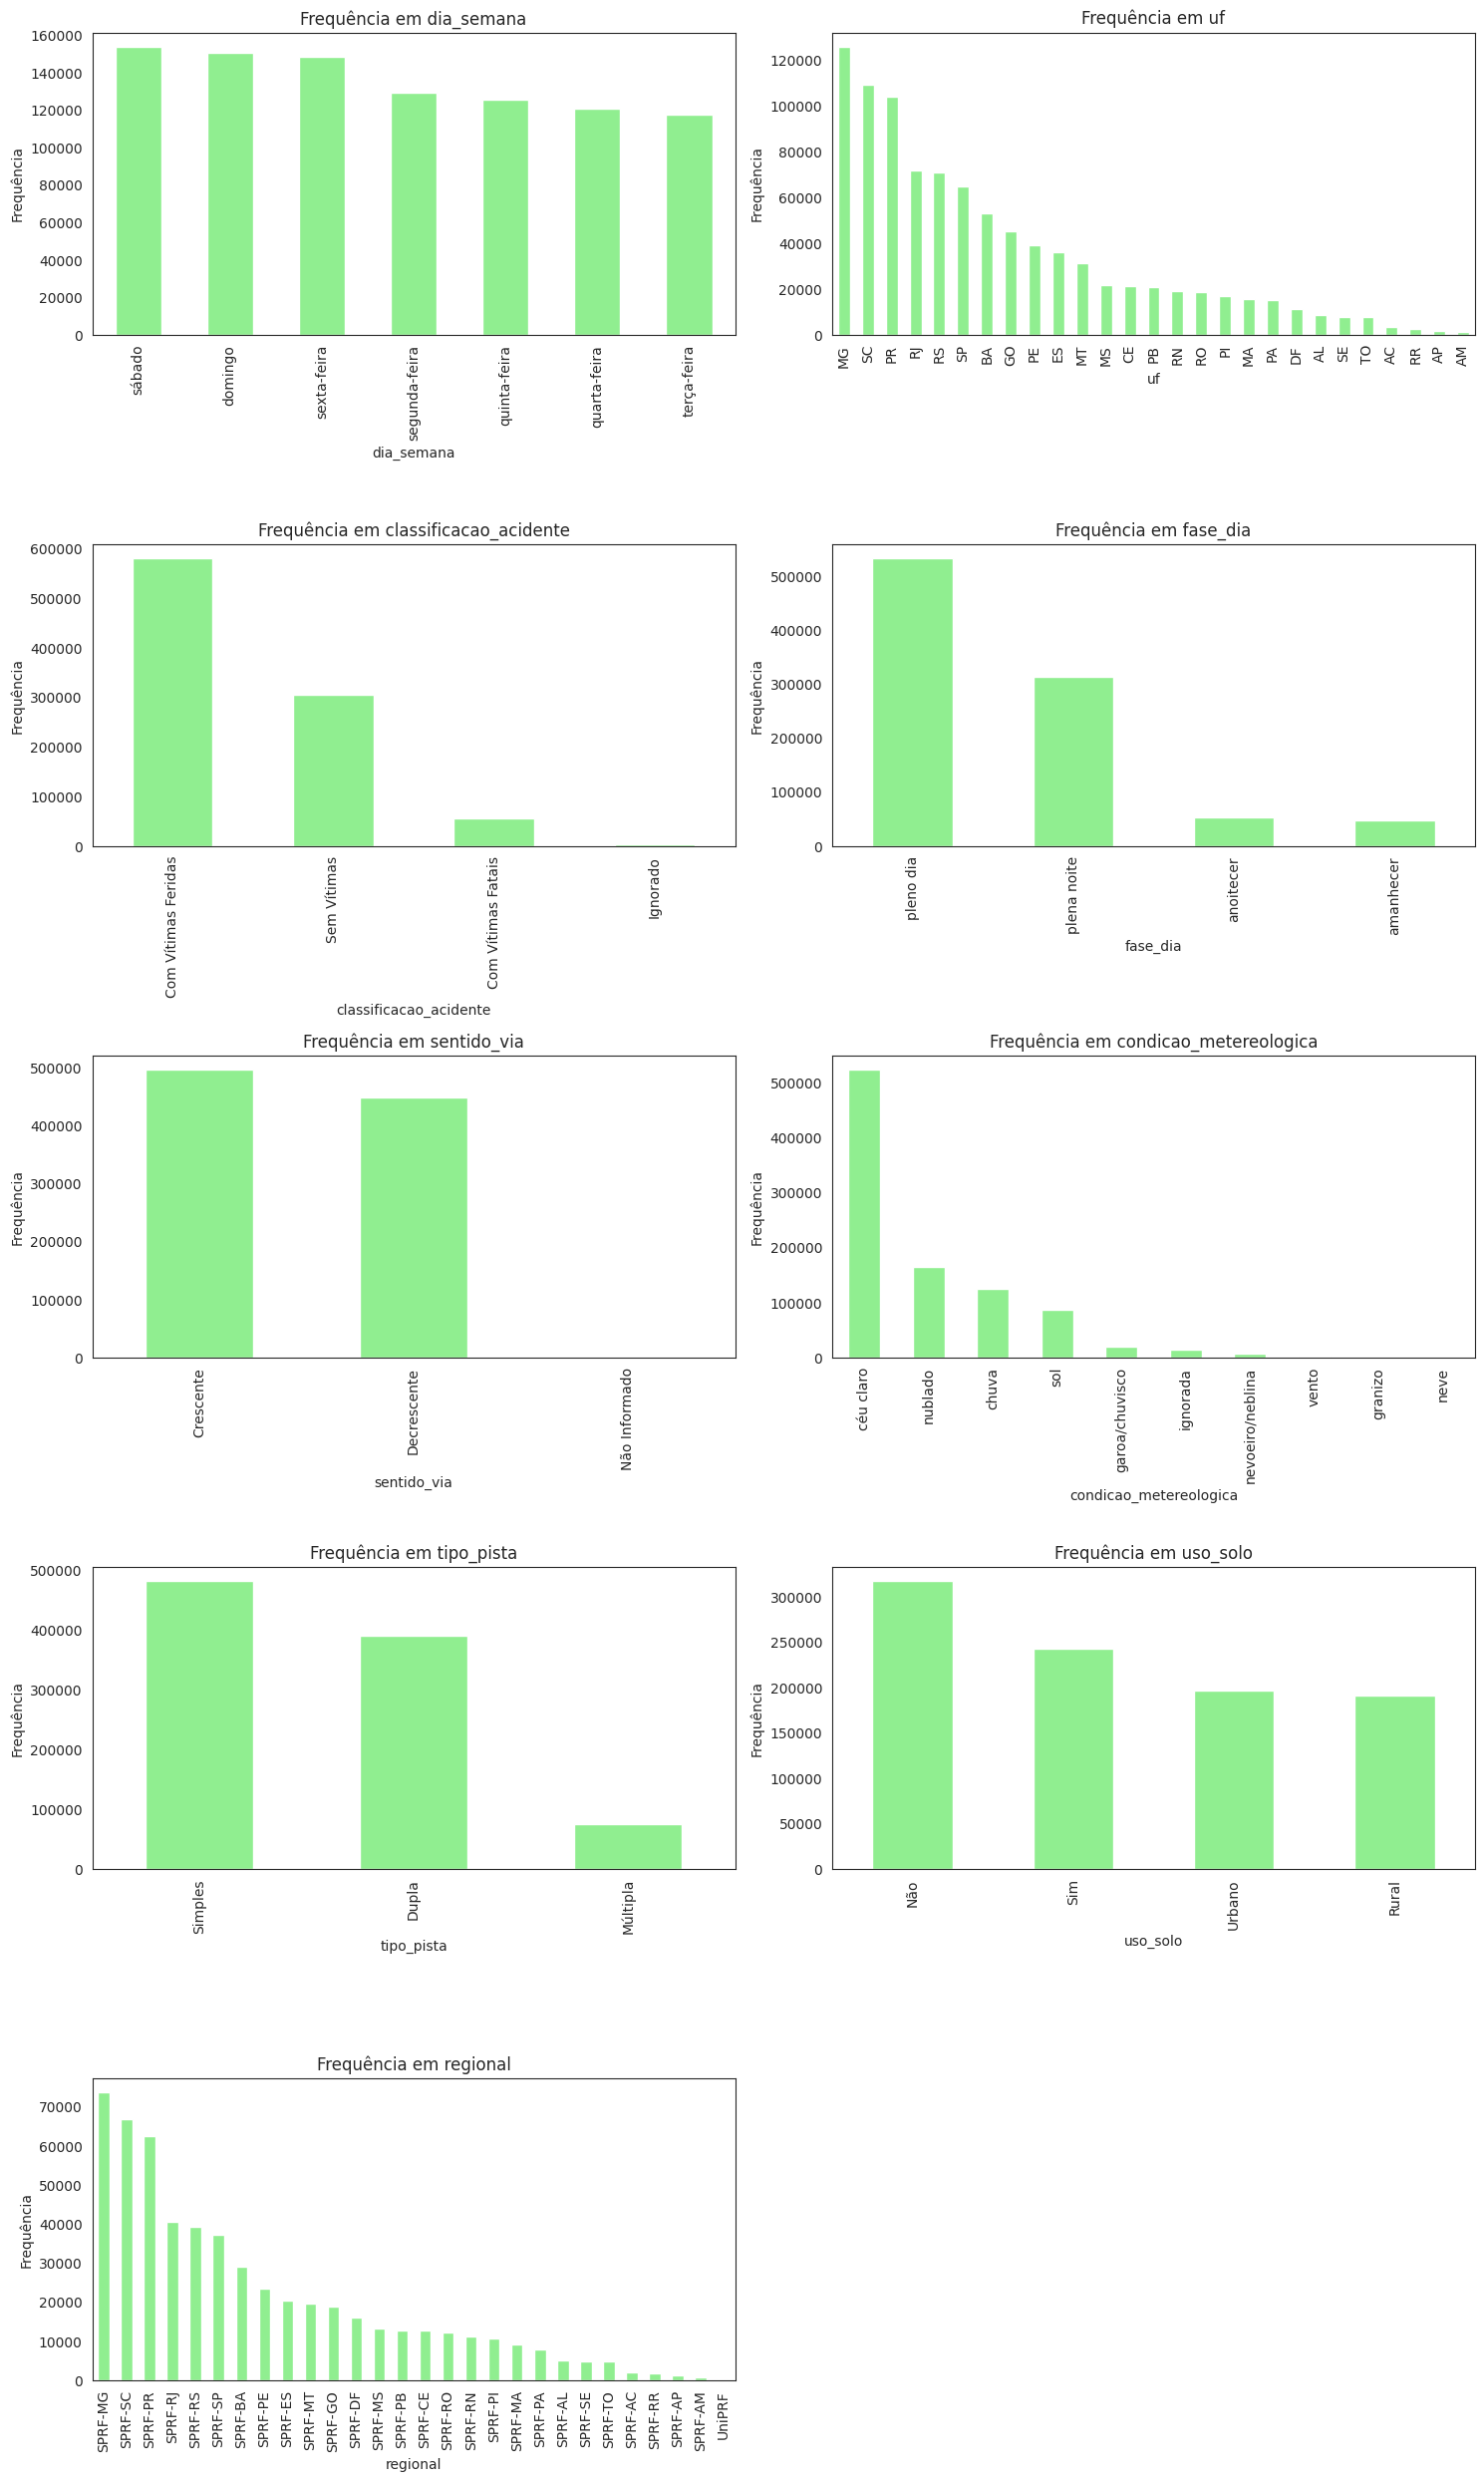

In [ ]:
# definindo uma função que plota a frequência de todas as variáveis categóricas

def plot_categorical_frequency_pt(df, corte_cardinalidade=30, graficos_por_linha=2):
    """
    Plota a frequência de categorias para variáveis categóricas em um DataFrame.

    Parâmetros:
    - df: DataFrame para plotagem.
    - corte_cardinalidade: Cardinalidade máxima para uma coluna ser considerada (padrão é 30).
    - graficos_por_linha: Quantidade de gráficos por linha (padrão é 3).

    Retorna:
    - Exibe os gráficos de barras.
    """

    # Gera metadados para o DataFrame
    metadados = []
    for coluna in df_total.columns:
        metadados.append({
            'Variável': coluna,
            'Tipo': df[coluna].dtype,
            'Cardinalidade': df[coluna].nunique()
        })

    df_metadados = pd.DataFrame(metadados)

    # Filtra colunas com cardinalidade maior que o corte e tipos não numéricos
    variaveis_categoricas = df_metadados[(df_metadados['Cardinalidade'] <= corte_cardinalidade) & (df_metadados['Tipo'] == 'object')]

    # Calcula o número de linhas e colunas para os subplots
    n_linhas = -(-len(variaveis_categoricas) // graficos_por_linha)  # Ceiling division
    n_colunas = min(len(variaveis_categoricas), graficos_por_linha)

    # Plota as variáveis categóricas
    fig, axs = plt.subplots(nrows=n_linhas, ncols=n_colunas, figsize=(15, 5 * n_linhas))

    for i, (idx, linha) in enumerate(variaveis_categoricas.iterrows()):
        var = linha['Variável']
        ax = axs[i // graficos_por_linha, i % graficos_por_linha]
        df_total[var].value_counts(dropna=True).plot(kind='bar', ax=ax, color='lightgreen')
        ax.set_title(f'Frequência em {var}')
        ax.set_ylabel('Frequência')
        ax.set_xlabel(var)

    # Remove os eixos vazios, se houver
    for j in range(i + 1, n_linhas * n_colunas):
        axs[j // graficos_por_linha, j % graficos_por_linha].axis('off')

    plt.tight_layout()
    plt.show()

# Testa a função com os dados e o corte padrão de cardinalidade
plot_categorical_frequency_pt(df_total, corte_cardinalidade=30, graficos_por_linha=2)

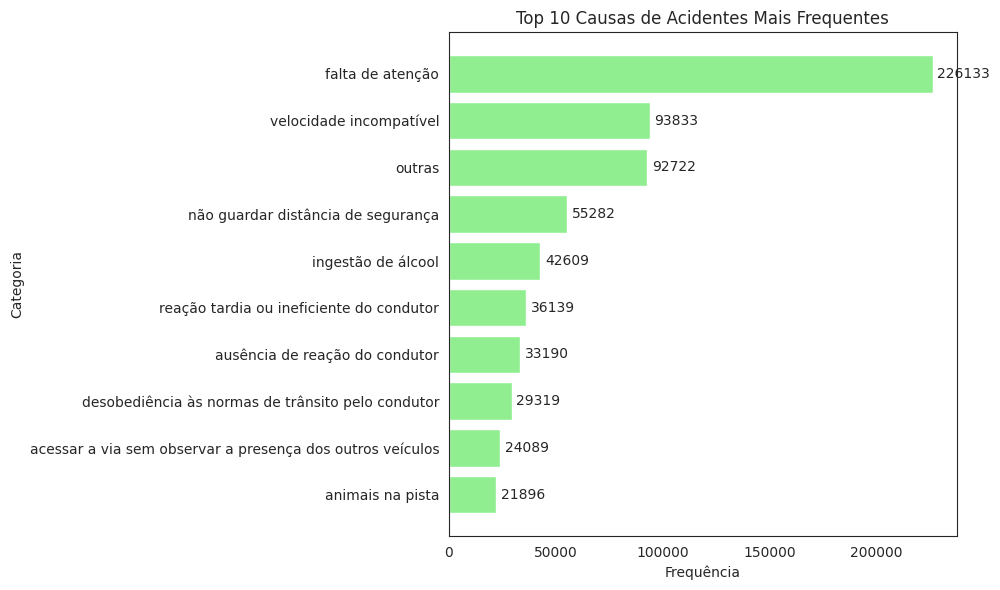

In [ ]:
# Aplicando o mesmo conceito na coluna causa_acidente:

import matplotlib.pyplot as plt

# Calcula os 10 valores mais frequentes
top_10 = df_total['causa_acidente'].value_counts().head(10)

# Cria o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10.index, top_10.values, color='lightgreen')

# Inverte a ordem para o mais frequente ficar no topo
plt.gca().invert_yaxis()

# Adiciona os valores numéricos ao lado das barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(top_10.values)*0.01, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center')

# Títulos e layout
plt.title('Top 10 Causas de Acidentes Mais Frequentes')
plt.xlabel('Frequência')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()

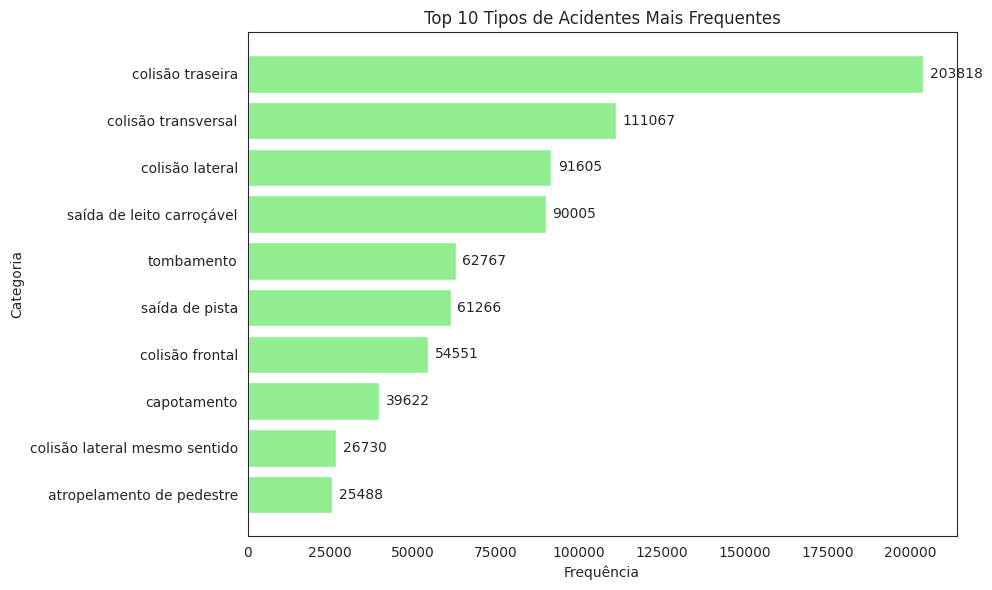

In [ ]:
# Aplicando o mesmo conceito na coluna tipo_acidente:

import matplotlib.pyplot as plt

# Calcula os 10 valores mais frequentes
top_10 = df_total['tipo_acidente'].value_counts().head(10)

# Cria o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10.index, top_10.values, color='lightgreen')

# Inverte a ordem para o mais frequente ficar no topo
plt.gca().invert_yaxis()

# Adiciona os valores numéricos ao lado das barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(top_10.values)*0.01, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center')

# Títulos e layout
plt.title('Top 10 Tipos de Acidentes Mais Frequentes')
plt.xlabel('Frequência')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()

**Dias da Semana (dia_semana):** A maioria dos registros parece ocorrer nos finais de semana (sábado e domingo) e sexta-feira. Isso pode indicar um aumento de atividades ou eventos que resultam em mais registros nesses dias.

**UF (Estados):**
Alguns estados têm uma contagem mais alta de registros em comparação com outros. É essencial considerar a população e o tamanho de cada estado ao interpretar esses dados. Por exemplo, estados mais populosos ou com maiores redes rodoviárias podem naturalmente ter mais registros. Os três estados com maior frequência são, respectivamente, Minas Gerais, Santa Catarina e Paraná.

**Causa do Acidente (causa_acidente):** O motivo "Falta de atenção" é o mais frequente, porém é subjetivo, não evidenciando claramente a causa do acidente.Velocidade incompatível também é muito frequente, o que motiva a aplicação de programas de conscientização para motoristas. A causa "Outras" também deixa o resultado subjetivo, pois não é possível determinar claramente a causa do acidente.

**Tipo do Acidente (tipo_acidente):** O motivo "Colisão traseira" é o mais frequente dos tipos de acidente, seguido de "Colisão lateral" e "Saída de leito carroçável" (valor quantitativo bem parecido). Obs: podemos fazer uma relação entre a falta de atenção dos motoristas com a colisão traseira, pois são respectivamente a casa e o tipo de acidente mais frequentes -> a falta de atenção dentro do veículo pode causar a colisão traseira.

**Classificação do Acidente (classificacao_acidente):** A maioria dos acidentes parece ser com vítimas feridas.

**Fase do Dia (fase_dia):** Os acidentes parecem ser mais comuns durante o dia, e em segundo lugar, durante a noite. As fases 'Anoitecer' e 'Amanhecer' tem menor frequência.  

**Condição Meteorológica (condicao_metereologica):** A maioria dos registros ocorre em condições claras (céu claro), mas também destaca que condições adversas, como chuva ou neblina, não sendo os principais contribuintes para os acidentes, embora possam aumentar sua gravidade.

**Tipo de Pista (tipo_pista):** A maioria dos registros ocorre em pistas simples, o que pode indicar que essas pistas apresentam mais riscos ou que são mais comuns nas áreas abrangidas pelos dados. Porém, as pistas duplas, em números totais, também representam bastante do número de acidentes.

## **Variáveis numéricas**

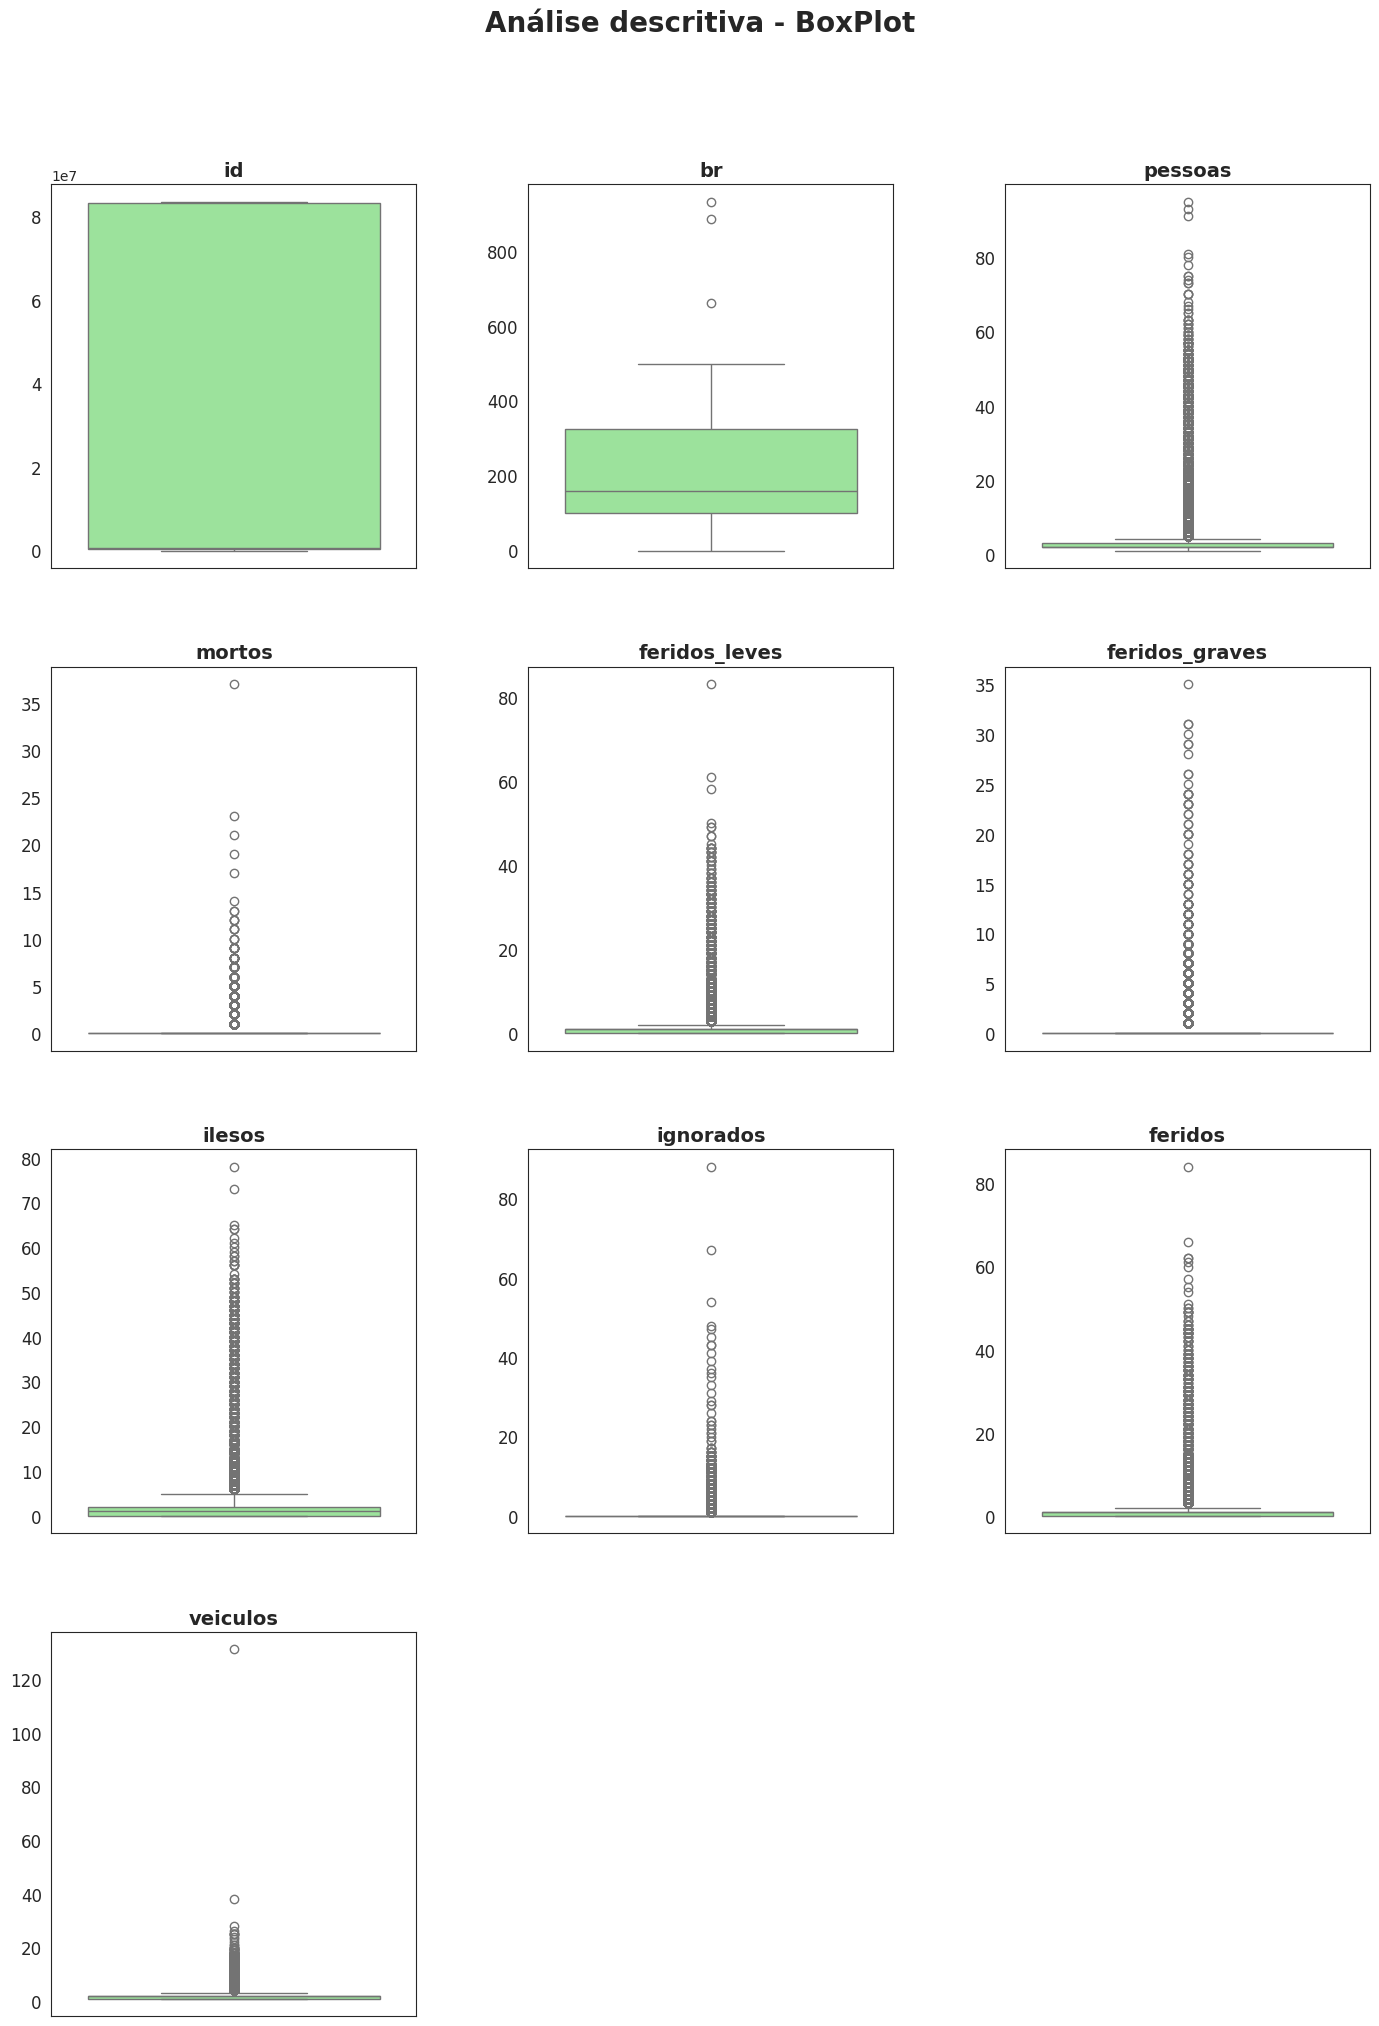

In [ ]:
# definindo uma função que plota a frequência de todas as variáveis numéricas

def box_plot(dataframe):
    """
    Plota boxplots estilizados com título simplificado para todas as variáveis numéricas do dataframe fornecido
    em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os boxplots serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=5)

    # Configura estilo e paleta de cores
    sns.set_style("white")

    # Plota boxplots para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.boxplot(data=dataframe[column], ax=axes[i//3, i%3], color="lightgreen")
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - BoxPlot", fontsize=20, fontweight='bold', y=1.05)

# Plotando os boxplots estilizados com títulos simplificados usando a função definida
box_plot(df_total)

**Identificador (id):** campo somente para identificação do acidente, portanto não deve ser interpretada estatisticamente.

**Rodovia (br):** representa o número (nome) da rodovia.

**Pessoas envolvidas no acidente (pessoas):** a maior parte envolve até 4 ou 5 pessoas, porém existem outliers extremos, com acidentes envolvendo até 90 pessoas -> acidentes com muitos passageiros indicam possíveis ônibus, vans ou aglomerações em veículos.

**Número de mortos (mortos):** a grande maioria dos acidentes tem 0 mortes, porém existem outliers fortes, com acidentes chegando a 35 mortos -> embora raros, esses acidentes com mortes em massa podem ser eventos com múltiplos veículos ou coletivos.

**Feridos leves:** predominância de zero ou poucos feridos (0 a 2). Outliers chamativos (até 80), indicando acidentes com impacto grande -> muito semelhante ao padrão de “pessoas”, indicando que ferimentos leves são comuns em acidentes com muitas pessoas.

**Feridos graves:** também predominam os valores baixos, com muitos zeros.Existem outliers de até 35 feridos graves -> assim como “mortos”, essa variável mostra a gravidade dos acidentes extremos.

**Pessoas envolvidas que saíram ilesas (ilesos):** maioria é entre 0 e 2, mas há muitos outliers. Alguns acidentes tiveram mais de 70 pessoas ilesas.

**Pessoas em condições não informadas (ignorados):** em geral muito poucos (0 a 1), mas com alguns outliers pontuais. Pode indicar dados mal preenchidos, especialmente em acidentes com muitas pessoas.

**Soma de leves + graves + ignorados (feridos):** distribuição parecida com as variáveis anteriores. Outliers até 80 feridos. Obs: é a medida agregada de gravidade sem considerar mortes.

**Número de veículos envolvidos (veiculos):** grande maioria tem 1 ou 2, mas alguns acidentes têm até 130 veículos (outliers bem evidentes) -> um valor como 130 pode ser um erro de digitação; acidentes reais com mais de 10 veículos são raros, talvez envolvam engavetamentos em rodovias com baixa visibilidade.

**Latitude e Longitude:** localização geográfica representada em números.

**Observação: de maneira geral, a grande maioria dos acidentes tem a tendência de manter um "padrão" no número de mortos, feridos (leves, graves), ilesos, ignorados e veículos envolvidos, porém todas essas variáveis apresentam outliers marcantes. Essa situação demonstra que acidentes mais graves e envolvendo mais pessoas/veículos são raros porém impactantes, porque alteram completamente o "padrão" da grande maioria dos acidentes registrados.**

# **VISUALIZAÇÃO E TENDÊNCIAS**

In [ ]:
# Ajustando a coluna de data:

# ajustando a coluna data_inversa
df_total['data_inversa'] = pd.to_datetime(df_total['data_inversa'], format='mixed', dayfirst=True)

# convertendo a coluna de data do acidente para datetime:
df_total['data_inversa'] = pd.to_datetime(df_total['data_inversa'])

In [ ]:
df_total

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,1175.0,2014-11-22,Sábado,19:20:00,BA,116,778.1,PLANALTO,ingestão de álcool,Atropelamento de pessoa,(null),plena noite,Decrescente,nevoeiro/neblina,Simples,Reta,Urbano,2,0,0,1,1,0,1,1,NaN,NaN,NaN,NaN,NaN
1,12.0,2014-11-22,Sábado,08:30:00,SP,116,212.0,GUARULHOS,outras,Colisão com objeto fixo,(null),pleno dia,Crescente,sol,Múltipla,Reta,Urbano,1,0,0,0,0,1,0,1,NaN,NaN,NaN,NaN,NaN
2,13.0,2014-11-20,Quinta,09:30:00,BA,367,31.6,PORTO SEGURO,outras,Saída de Pista,(null),pleno dia,Crescente,nublado,Simples,Reta,Rural,1,0,1,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN
3,14.0,2014-11-09,Domingo,22:50:00,SC,101,220.9,PALHOCA,falta de atenção,Colisão com objeto fixo,(null),plena noite,Decrescente,céu claro,Dupla,Reta,Urbano,1,0,1,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN
4,15.0,2014-11-19,Quarta,05:00:00,RJ,116,211.0,SEROPEDICA,outras,Atropelamento de pessoa,(null),amanhecer,Crescente,céu claro,Dupla,Reta,Urbano,1,0,0,0,1,0,0,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947858,661295.0,2024-12-21,sábado,07:00:00,PB,230,"135,2",CAMPINA GRANDE,ausência de reação do condutor,Saída de leito carroçável,Com Vítimas Feridas,pleno dia,Crescente,céu claro,Dupla,Curva,Não,1,0,1,0,0,0,1,1,-7.282103,-35.768394,SPRF-PB,DEL02-PB,UOP01-DEL02-PB
947859,661307.0,2024-12-01,domingo,06:30:00,RJ,393,298,VOLTA REDONDA,ausência de reação do condutor,Colisão frontal,Com Vítimas Feridas,pleno dia,Crescente,céu claro,Simples,Curva,Não,2,0,2,0,0,0,2,2,-22.543133,-44.112986,SPRF-RJ,DEL07-RJ,UOP02-DEL07-RJ
947860,661377.0,2024-07-09,terça-feira,16:20:00,ES,101,"101,5",SOORETAMA,desrespeitar a preferência no cruzamento,Colisão transversal,Com Vítimas Feridas,pleno dia,Crescente,sol,Simples,Interseção de Vias,Não,3,0,3,0,0,0,3,2,-18.988339,-39.999335,SPRF-ES,DEL04-ES,UOP02-DEL04-ES
947861,661576.0,2024-12-17,terça-feira,21:35:00,RJ,101,391,RIO DE JANEIRO,frear bruscamente,Colisão traseira,Com Vítimas Feridas,plena noite,Decrescente,céu claro,Dupla,Reta,Não,2,0,1,0,1,0,1,2,-22.894827,-43.68492,SPRF-RJ,DEL03-RJ,UOP01-DEL03-RJ


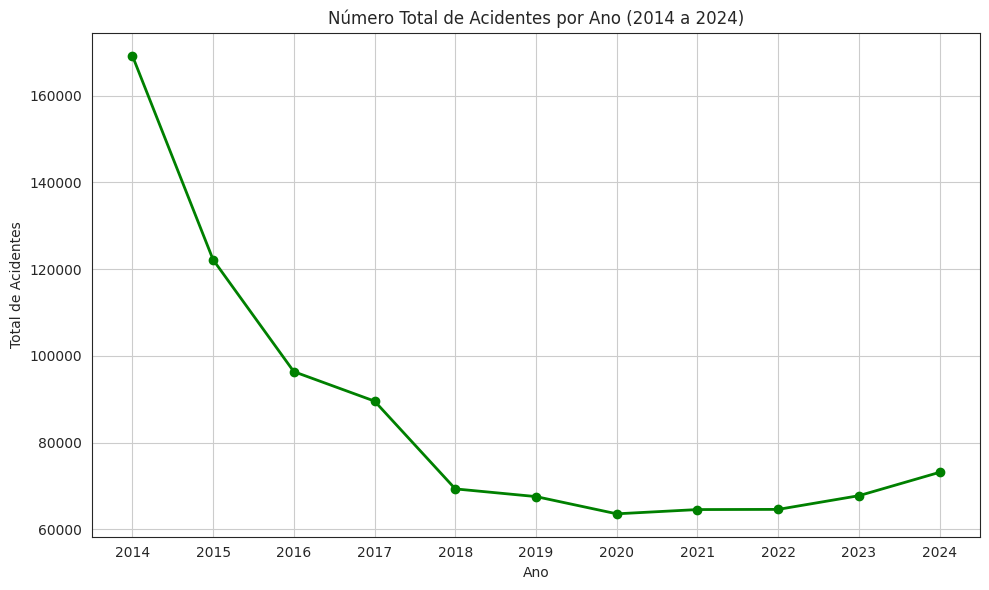

In [ ]:
# gráfico da evolução dos acidentes por ano

# Criar uma nova coluna com o ano
df_total['ano'] = df_total['data_inversa'].dt.year

# Filtrar dados apenas entre 2014 e 2024
df_filtrado = df_total[df_total['ano'].between(2014, 2024)]

# Contar acidentes por ano
quantidade_por_ano = df_filtrado.groupby('ano').size()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(quantidade_por_ano.index, quantidade_por_ano.values, marker='o', color='green', linewidth=2)

plt.title('Número Total de Acidentes por Ano (2014 a 2024)')
plt.xlabel('Ano')
plt.ylabel('Total de Acidentes')
plt.xticks(ticks=range(2014, 2025))
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Conferindo as informações do gráfico:

# Extrai o ano da data
df_total['ano'] = df_total['data_inversa'].dt.year

# Conta as ocorrências de todos os anos
df_total['ano'].value_counts().sort_index()


,count
ano,
2014,169201
2015,122161
2016,96363
2017,89567
2018,69333
2019,67558
2020,63585
2021,64567
2022,64606


In [ ]:
# quantidade de acidentes por mês:

quantidade_por_mes = df_total.groupby(df_total['data_inversa'].dt.month).size()
print(quantidade_por_mes)

data_inversa
1     82796
2     76657
3     81571
4     78954
5     80583
6     77505
7     77890
8     77114
9     76090
10    78667
11    74927
12    85109
dtype: int64


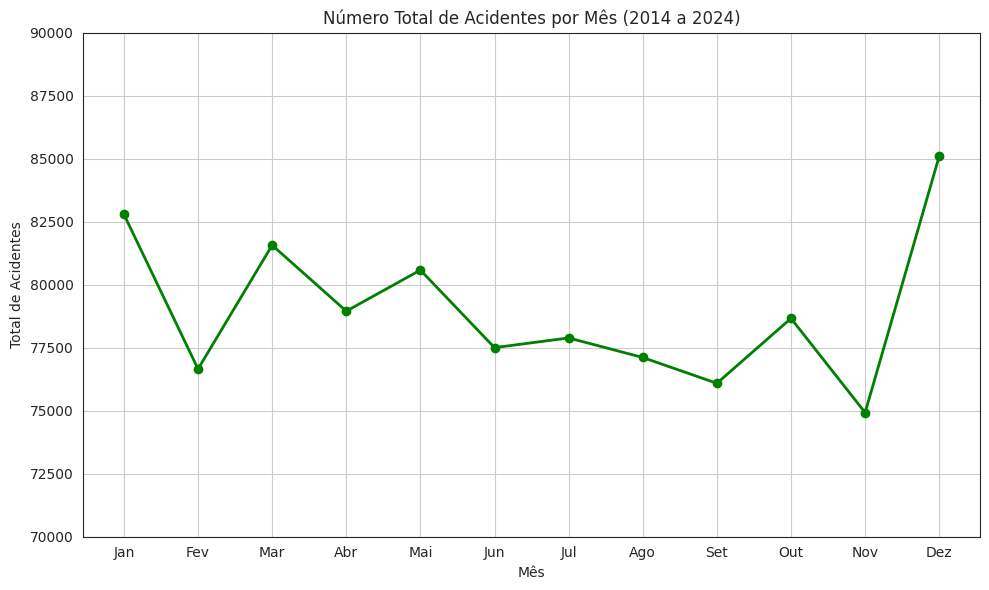

In [ ]:
# gráfico da quantidade total dos acidentes por mês

import matplotlib.pyplot as plt

# Contar acidentes por mês
quantidade_por_mes = df_total.groupby(df_total['data_inversa'].dt.month).size()

# Lista com nomes dos meses em português
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(quantidade_por_mes.index, quantidade_por_mes.values, marker='o', color='green', linewidth=2)

plt.title('Número Total de Acidentes por Mês (2014 a 2024)')
plt.xlabel('Mês')
plt.ylabel('Total de Acidentes')
plt.xticks(ticks=range(1, 13), labels=meses)
plt.ylim(70000, 90000)  # Limitar o eixo Y entre 70000 e 90000
plt.grid(True)
plt.tight_layout()
plt.show()

**ANÁLISE:**

Mês com maior ocorrência de acidentes no intervalo estudado: Dezembro (85.109 registros)

Mês com menor ocorrência de acidentes no intervalo estudado: Novembro (74.927 registros)

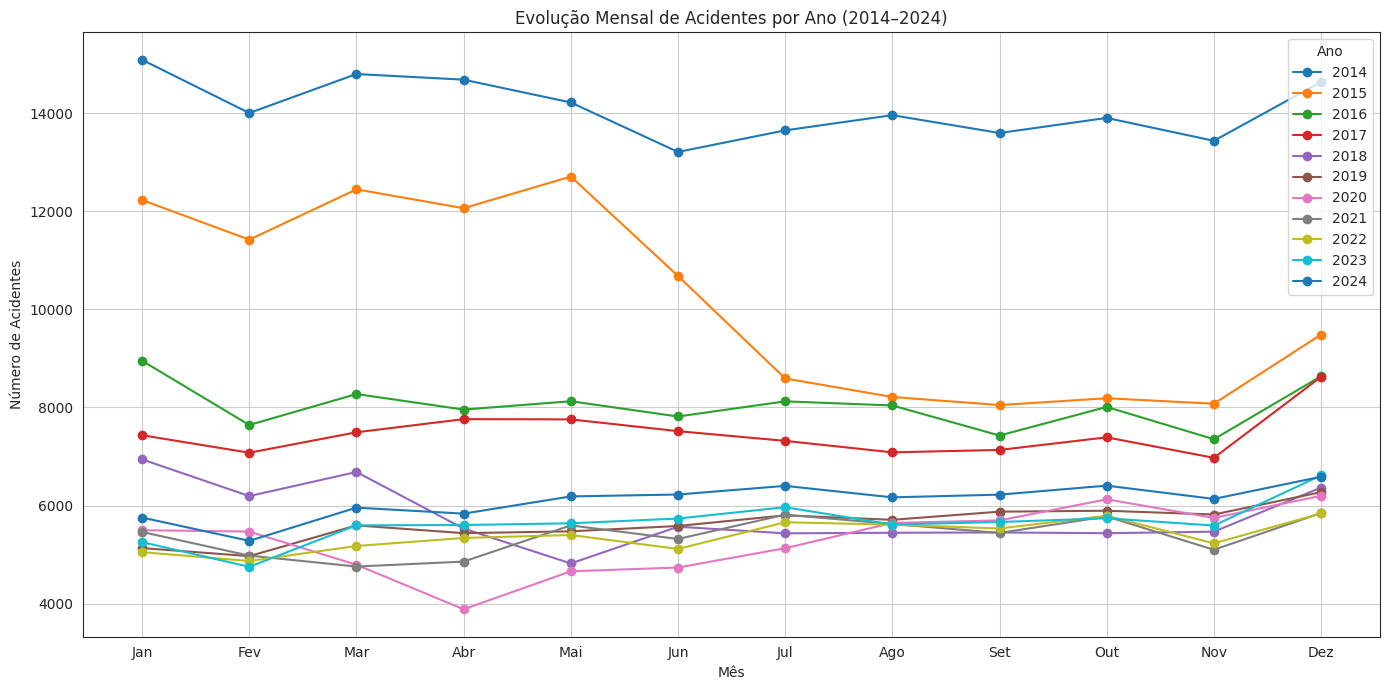

In [ ]:
# gráfico da evolução mensal dos acidentes por ano

# Garante que a coluna está como datetime
df_total['data_inversa'] = pd.to_datetime(df_total['data_inversa'], errors='coerce')

# Cria colunas auxiliares para ano e mês
df_total['ano'] = df_total['data_inversa'].dt.year
df_total['mes'] = df_total['data_inversa'].dt.month

# Filtra apenas anos de interesse
df_filtrado = df_total[df_total['ano'].between(2014, 2024)]

# Agrupa por ano e mês, contando os acidentes
acidentes_mensais = df_filtrado.groupby(['ano', 'mes']).size().unstack(level=0)

# Lista de nomes dos meses em português (opcional)
meses_pt = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
            'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Plota o gráfico
plt.figure(figsize=(14, 7))

for ano in acidentes_mensais.columns:
    plt.plot(acidentes_mensais.index, acidentes_mensais[ano], marker='o', label=str(ano))

plt.title('Evolução Mensal de Acidentes por Ano (2014–2024)')
plt.xlabel('Mês')
plt.ylabel('Número de Acidentes')
plt.xticks(ticks=range(1, 13), labels=meses_pt)
plt.legend(title='Ano')
plt.grid(True)
plt.tight_layout()
plt.show()


 O comportamento de queda no número de acidentes a partir de 2016, com os anos de 2014 e 2015 acima da média (atípicos), pode ter algumas explicações plausíveis:


*   Mudanças em políticas públicas e fiscalização:

2014–2015 foram anos com grandes campanhas de segurança viária no Brasil, como a ampliação de radares, Lei Seca e Operações da PRF. A partir de 2016, houve um esforço mais forte da PRF em educação no trânsito, e maior uso de tecnologia para fiscalização automatizada, o que pode ter reduzido os acidentes.


*   Mudanças na forma de registro dos acidentes:

A PRF passou por mudanças nos sistemas de dados ao longo dos anos. É possível que houvesse sub-registro ou mudanças nos critérios de registro de acidentes após 2016, afetando a quantidade relatada — não necessariamente os acidentes caíram, mas sim foram registrados de forma diferente.


*   Crise econômica a partir de 2015–2016:

Menor fluxo de veículos nas rodovias -> a crise que começou em 2015 e se intensificou em 2016 levou a: Redução de viagens; Menor transporte de cargas; Menor número de veículos circulando nas estradas.Isso pode ter reduzido naturalmente o número de acidentes.


*   Pandemia (2020–2021):

Mesmo que você tenha notado a queda antes da pandemia, é bom lembrar que: durante a pandemia, houve um impacto muito direto no trânsito, com menos veículos circulando. Se a tendência se manteve estável de 2020 em diante, o isolamento e restrições também contribuíram.


*   Melhorias na infraestrutura viária:

Entre 2015 e 2019 houve melhorias em várias rodovias federais, como duplicações, novos trechos e recapeamentos. Isso pode ter contribuído para reduzir colisões frontais e acidentes graves, especialmente nos estados com maiores investimentos (SP, PR, MG, RS...).

/tmp/ipython-input-1831016514.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_causas, x='mortos', y='causa_acidente', palette='Blues_d')


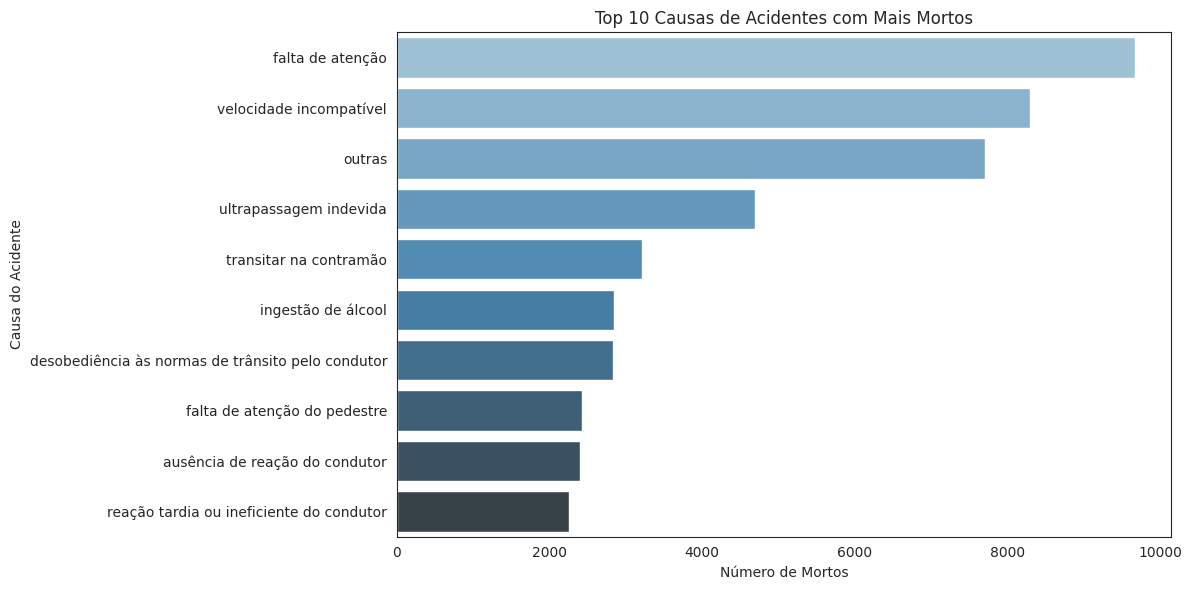

In [ ]:
# gráfico da relação entre as 10 mais frequentes causas de acidentes e mortos:

import seaborn as sns
import matplotlib.pyplot as plt

relacao_causa_mortos = df_total.groupby('causa_acidente')['mortos'].sum().reset_index()

# Ordenar da maior para a menor quantidade de mortos
relacao_causa_mortos = relacao_causa_mortos.sort_values(by='mortos', ascending=False)

# Pegar o top 10 já ordenado
top_10_causas = relacao_causa_mortos.head(10)

# Criar o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_causas, x='mortos', y='causa_acidente', palette='Blues_d')

plt.title('Top 10 Causas de Acidentes com Mais Mortos')
plt.xlabel('Número de Mortos')
plt.ylabel('Causa do Acidente')
plt.tight_layout()
plt.show()

A maior causa de acidentes que causam fatalidades (mortes) é Transitar na contramão, seguido por "falhas" na reação do condutor (Ausência de reação e Reação tardia/ineficiente) e na sequência, Velocidade incompatível (possivelmente, alta velocidade).

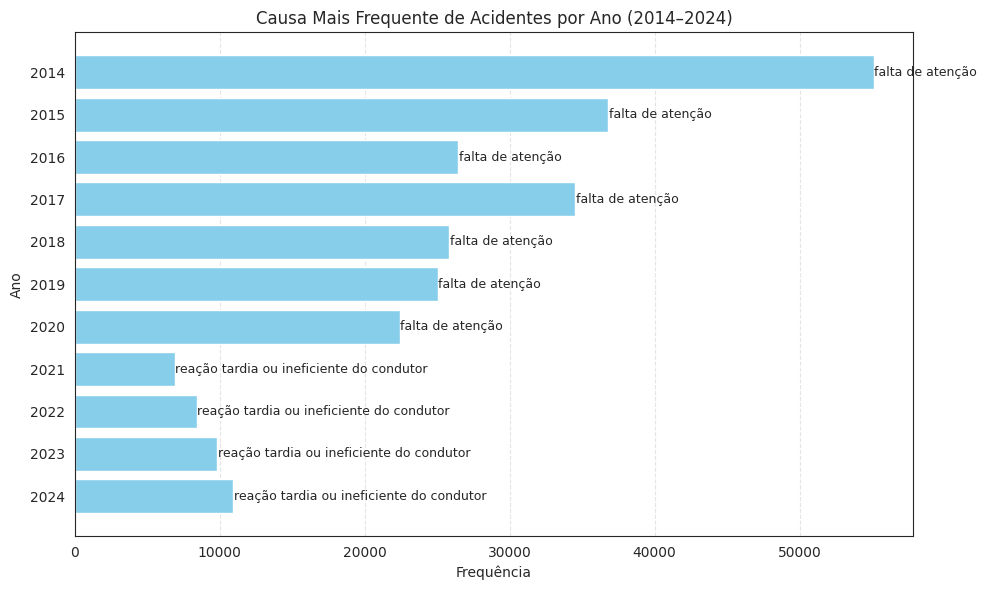

In [ ]:
import matplotlib.pyplot as plt

# Se ainda não tiver rodado, rode o código para gerar o DataFrame com a causa mais frequente por ano:
df_total['data_inversa'] = pd.to_datetime(df_total['data_inversa'], errors='coerce')
df_total['ano'] = df_total['data_inversa'].dt.year
coluna_causa = 'causa_acidente'

# Agrupa e encontra a causa mais frequente por ano
frequencias = (
    df_total[df_total['ano'].between(2014, 2024)]
    .groupby(['ano', coluna_causa])
    .size()
    .reset_index(name='frequencia')
)

causa_mais_frequente_por_ano = (
    frequencias.sort_values(['ano', 'frequencia'], ascending=[True, False])
    .groupby('ano')
    .first()
    .reset_index()
)

# ✅ Gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(causa_mais_frequente_por_ano['ano'].astype(str), causa_mais_frequente_por_ano['frequencia'], color='skyblue')

# Adiciona os rótulos com o nome da causa
for index, row in causa_mais_frequente_por_ano.iterrows():
    plt.text(row['frequencia'] + 50, index, row[coluna_causa], va='center', fontsize=9)

# Eixo Y em ordem crescente (2014 no topo → 2024 na base)
plt.gca().invert_yaxis()

plt.xlabel('Frequência')
plt.ylabel('Ano')
plt.title('Causa Mais Frequente de Acidentes por Ano (2014–2024)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Em todos os anos estudados, as causas mais frequentes foram "falta de atenção" e "reação tardia ou ineficiente do condutor".

In [ ]:
# top 10 rodovias com maior frequência de acidentes (rodovias mais perigosas)

top10_rodovias = df_total['br'].value_counts().head(10).reset_index()
top10_rodovias.columns = ['rodovia', 'quantidade total de acidentes']

print(top10_rodovias)

   rodovia  quantidade total de acidentes
0      101                         159513
1      116                         147827
2      381                          48151
3       40                          44456
4      153                          37433
5      364                          30255
6      163                          28141
7      277                          26643
8      376                          25813
9      262                          25621


Observa-se que as rodovias 101 e 116 detém grande parte dos acidentes que ocorreram. Esse fato pode ser justificado pela extensão da rodovia (passando por vários estados, por exemplo), que consequentemente gera maior chance de ocorrer acidentes; entretanto, é necessário uma investigação mais profunda, pois podem existir outros fatores que contribuem para esses números marcantes (ex: falhas de sinalização, falta de radar, baixa qualidade de infraestrutura em pontos da rodovia etc).

/tmp/ipython-input-2712118564.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_comb_rodovia_uf, x='quantidade', y='rodovia_uf', palette='mako')


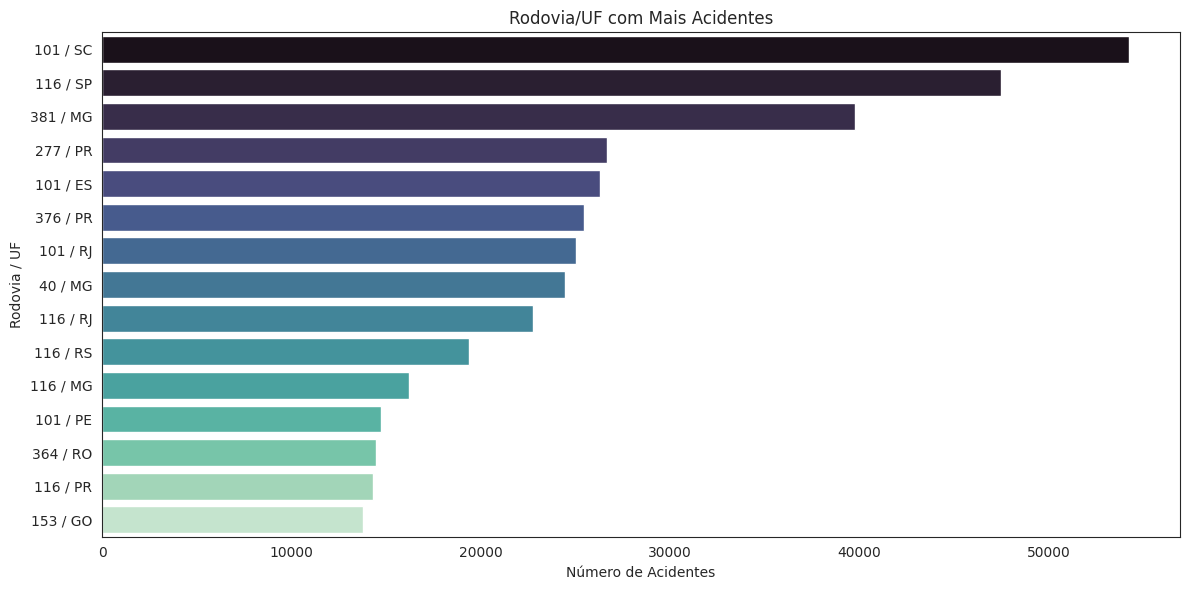

In [ ]:
# distribuição dos acidentes por UF para as 10 rodovias mais perigosas

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Lista das 10 rodovias com mais acidentes
rodovias_top10 = top10_rodovias['rodovia'].tolist()

# 2. Filtra o DataFrame para manter apenas essas rodovias
df_filtrado = df_total[df_total['br'].isin(rodovias_top10)]

# 3. Agrupa por rodovia e UF
agrupado = df_filtrado.groupby(['br', 'uf']).size().reset_index(name='quantidade')

# 4. Cria coluna combinada
agrupado['rodovia_uf'] = agrupado['br'].astype(str) + ' / ' + agrupado['uf'].astype(str)

# 5. Pega somente os 10 maiores resultados
top10_comb_rodovia_uf = agrupado.sort_values(by='quantidade', ascending=False).head(15)

# 6. Plotagem
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_comb_rodovia_uf, x='quantidade', y='rodovia_uf', palette='mako')

plt.title('Rodovia/UF com Mais Acidentes')
plt.xlabel('Número de Acidentes')
plt.ylabel('Rodovia / UF')

plt.tight_layout()
plt.show()

**O gráfico acima demonstra em qual região (estado) tem o maior número de acidentes, considerando as 10 rodovias mais perigosas, que foram listadas anteriormente.**
- As 3 rodovias com mais acidentes são: 101 (no estado de Santa Catarina); 116 (no estado de São Paulo) e 381 (no estado de Minas Gerais). A rodovias 101 e 116 aparecem novamente no gráfico, mas em diferentes estados.

In [ ]:
# top 10 municípios com maior ocorrência de acidentes

# 1. Pega os 10 municípios com mais acidentes
top10_municipios = df_total['municipio'].value_counts().head(10).index.tolist()

# 2. Filtra o DataFrame original apenas para esses municípios
df_municipios = df_total[df_total['municipio'].isin(top10_municipios)]

# 3. Agrupa por município e UF e conta acidentes
agrupado = df_municipios.groupby(['municipio', 'uf']).size().reset_index(name='numero de acidentes')

# 4. Ordena pelos maiores números de acidentes e mantém só os 10 maiores
agrupado = agrupado.sort_values(by='numero de acidentes', ascending=False).head(10)

# 5. Renomeia a coluna UF para "estado"
agrupado = agrupado.rename(columns={'uf': 'estado'})

# 6. Reordena as colunas
agrupado = agrupado[['municipio', 'estado', 'numero de acidentes']]

# Resultado
print(agrupado)

         municipio estado  numero de acidentes
2         CURITIBA     PR                11807
1         BRASILIA     DF                11461
7         SAO JOSE     SC                10678
4        GUARULHOS     SP                10263
3  DUQUE DE CAXIAS     RJ                 8311
5          PALHOCA     SC                 8106
8            SERRA     ES                 7935
0            BETIM     MG                 7631
6           RECIFE     PE                 6750
9         TERESINA     PI                 6167


In [ ]:
# criando um nova coluna que indica a gravidade do acidente, ou seja, soma o número de mortos + feridos graves, para realizar algumas análises

df_total['gravidade'] = df_total['mortos'] + df_total['feridos_graves']

In [ ]:
# comparando a gravidade do acidente x condição metereologica no momento

df_total.groupby('condicao_metereologica')['gravidade'].sum().sort_values(ascending=False)

,gravidade
condicao_metereologica,
céu claro,169006
nublado,47492
chuva,30864
sol,21609
ignorada,5596
garoa/chuvisco,5404
nevoeiro/neblina,2986
vento,823
granizo,15


**A grande maioria dos acidentes graves acontece na condição de "Céu claro".**

In [ ]:
# comparando a gravidade do acidente x fase do dia no momento

df_total.groupby('fase_dia')['gravidade'].sum().sort_values(ascending=False)

,gravidade
fase_dia,
pleno dia,135956
plena noite,114956
anoitecer,16624
amanhecer,16269


**A grande maioria dos acidentes graves acontece na fase do dia "Pleno dia" e "Plena noite".**

In [ ]:
# comparando a gravidade do acidente x tipo de pista:

df_total.groupby('tipo_pista')['gravidade'].sum().sort_values(ascending=False)

,gravidade
tipo_pista,
Simples,182111
Dupla,86448
Múltipla,15247


/tmp/ipython-input-1988858086.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dados_plot, x='gravidade', y='tipo_pista', palette='Reds_r')


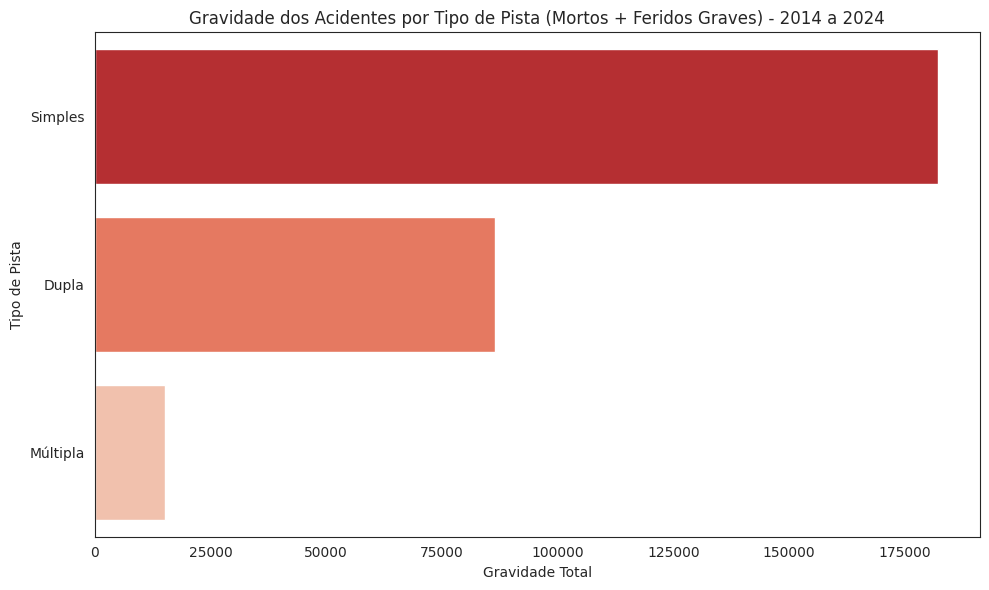

In [ ]:
# CRIANDO VISUALIZAÇÃO DA GRAVIDADE X TIPO DE PISTA:

import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por tipo_pista e somar a gravidade
dados_plot = df_total.groupby('tipo_pista')['gravidade'].sum().sort_values(ascending=False).reset_index()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=dados_plot, x='gravidade', y='tipo_pista', palette='Reds_r')

plt.title('Gravidade dos Acidentes por Tipo de Pista (Mortos + Feridos Graves) - 2014 a 2024')
plt.xlabel('Gravidade Total')
plt.ylabel('Tipo de Pista')
plt.tight_layout()
plt.show()

Com o gráfico anterior, fica evidente que os acidentes mais graves (que envolvem mortos e feridos) acontecem em pistas simples; verifica-se, portanto, que essas pistas são mais perigosas se comparadas á pista dupla ou múltipla, ocasionando maior quantidade de acidentes graves.

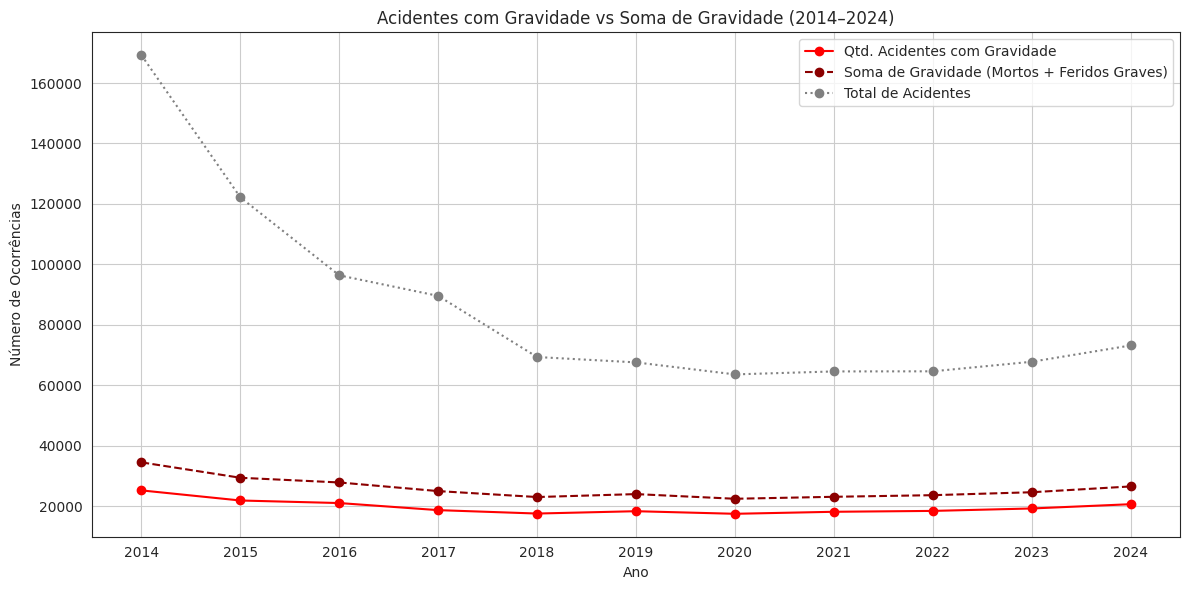

In [ ]:
# Extrai o ano da data
df_total['ano'] = df_total['data_inversa'].dt.year

# Filtra os anos de interesse
df_filtrado = df_total[df_total['ano'].between(2014, 2024)]

# Acidentes com gravidade > 0 (pelo menos um morto ou ferido grave)
acidentes_graves = df_filtrado[df_filtrado['gravidade'] > 0]

# 1. Quantidade de acidentes graves por ano
qtd_acidentes_graves = acidentes_graves.groupby('ano').size()

# 2. Soma da gravidade (mortos + feridos graves) por ano
soma_gravidade_ano = acidentes_graves.groupby('ano')['gravidade'].sum()

# 3. Total de acidentes por ano (para comparação)
qtd_acidentes_total = df_filtrado.groupby('ano').size()

# Plotando os gráficos
plt.figure(figsize=(12, 6))

plt.plot(qtd_acidentes_graves.index, qtd_acidentes_graves.values, marker='o', color='red', label='Qtd. Acidentes com Gravidade')
plt.plot(soma_gravidade_ano.index, soma_gravidade_ano.values, marker='o', color='darkred', linestyle='--', label='Soma de Gravidade (Mortos + Feridos Graves)')
plt.plot(qtd_acidentes_total.index, qtd_acidentes_total.values, marker='o', color='gray', linestyle=':', label='Total de Acidentes')

plt.title('Acidentes com Gravidade vs Soma de Gravidade (2014–2024)')
plt.xlabel('Ano')
plt.ylabel('Número de Ocorrências')
plt.xticks(range(2014, 2025))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Observa-se uma frequência de acidentes graves (com mortos e/ou feridos graves) similar ao longo dos anos. Pode-se inferir que mesmo os anos de 2014 e 2015 com um número mais alto de acidentes totais, a frequência dos graves se manteve.

**TOP 5 ESTADOS COM MAIOR FREQUÊNCIA DE ACIDENTES:** Minas Gerais, Santa Catarina, Paraná, Rio de janeiro e Rio Grande do Sul.

**Obs: todos os estados da Região Sul estão no presentes nesse top 5.**

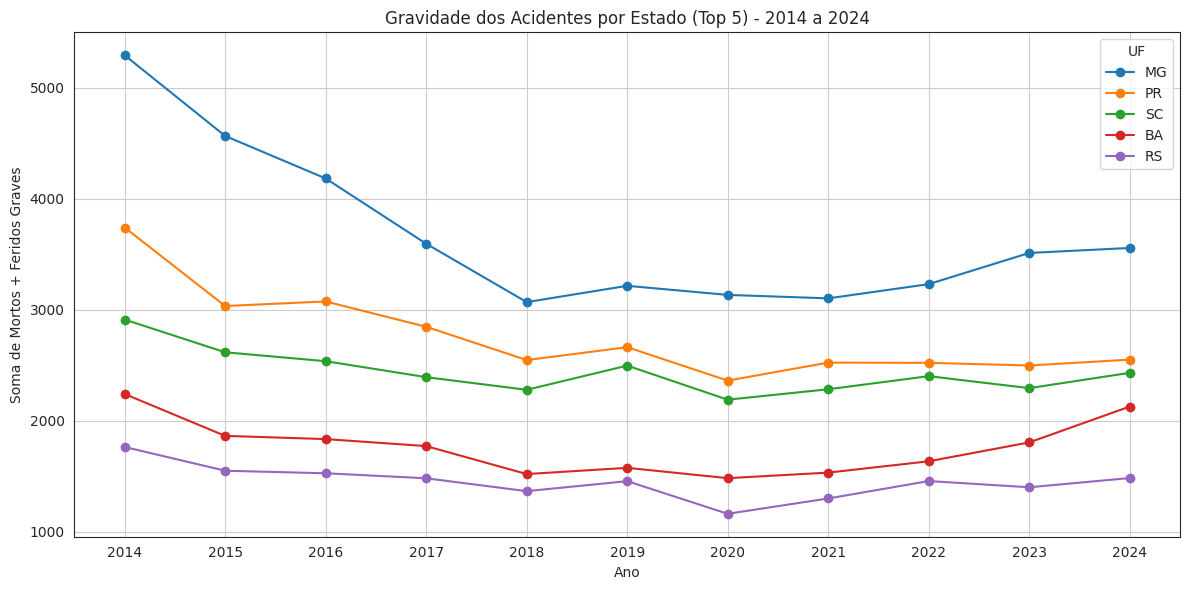

In [ ]:
# Comparativos entre os top 5 estados com mais acidentes x gravidade dos acidentes:

# Garante formato de data e cria coluna 'ano'
df_total['data_inversa'] = pd.to_datetime(df_total['data_inversa'], errors='coerce')
df_total['ano'] = df_total['data_inversa'].dt.year

# Filtra apenas os anos válidos
df_filtrado = df_total[df_total['ano'].between(2014, 2024)]

# Agrupa por estado e ano, somando a gravidade (mortos + feridos graves)
gravidade_por_estado_ano = df_filtrado.groupby(['uf', 'ano'])['gravidade'].sum().reset_index()

# Encontra os 5 estados com maior gravidade total no período
top_estados = (
    gravidade_por_estado_ano.groupby('uf')['gravidade'].sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filtra apenas os estados mais recorrentes
gravidade_top_estados = gravidade_por_estado_ano[gravidade_por_estado_ano['uf'].isin(top_estados)]

# Plotar o gráfico
plt.figure(figsize=(12, 6))

for estado in top_estados:
    dados_estado = gravidade_top_estados[gravidade_top_estados['uf'] == estado]
    plt.plot(dados_estado['ano'], dados_estado['gravidade'], marker='o', label=estado)

plt.title('Gravidade dos Acidentes por Estado (Top 5) - 2014 a 2024')
plt.xlabel('Ano')
plt.ylabel('Soma de Mortos + Feridos Graves')
plt.xticks(range(2014, 2025))
plt.legend(title='UF')
plt.grid(True)
plt.tight_layout()
plt.show()


*   **Bahia** é um estado que não está no top 5 de estados com maior frequência de acidentes e mesmo assim ela aparece em 4º lugar no quesito gravidade dos acidentes.

*   **Rio de Janeiro** está no top 5 de estados com maior frequência de acidentes e não aparece neste gráfico, mostrando que acidentes graves apresentam menor frequência se comparado aos outros tipos de acidente.

*   **Região Sul** é a região com maior frequência de acidentes e também maior número de acidentes graves, onde os 3 estados que a compõem estão presentes nos indicadores acima.

# **CONCLUSÃO**

✅ **1. Resumo das Principais Descobertas:**

•	Tendência temporal: 2014 e 2015 tiveram os maiores números de acidentes, destacando-se como anos atípicos. A partir de 2016, observa-se uma queda consistente no número de acidentes. De 2017 a 2024, os valores se mantêm em um patamar mais estável e baixo, com pouca variação entre os anos.

•	Indicadores geográficos: Alguns estados concentram mais acidentes, com destaque para Minas Gerais, Santa Catarina e Paraná. Curitiba (PR) e Brasília (DF) são as cidades com maior número de registros de acidentes.

•	Tipos de acidentes mais comuns: Colisão traseira é a mais frequente, seguida por colisão lateral e saída de leito carroçável.

•	Causas principais: Falta de atenção e Velocidade incompatível lideram como causas mais frequentes.

•	Acidentes graves: o número de acidentes graves (que envolvem mortos e/ou feridos graves) é bem maior em pistas simples se comparado a frequência em pistas duplas. Observa-se uma frequência equilibrada desse tipo de acidente ao longo dos anos estudados, sem presença de picos. Região Sul representa o maior número de acidentes graves

•	Variações sazonais: No geral, o mês de Dezembro é o que apresenta o maior número de registros e Novembro é o que apresenta o menor número, mas não há grande variação. Sábado e Domingo são os dias da semana com maior frequência de acidentes.

•	Variáveis numéricas: Existem vários outliers quando falamos em número de mortos e feridos (representando acidentes pontuais, que envolvem mais veículos e são mais graves), entretanto a grande maioria dos acidentes tem número de mortos e feridos entre 0 e 2. Média de veículos envolvidos é de 1 a 2.

•	Rodovias: As rodovias com maior frequência de acidentes são, respectivamente, BR 101 (SC), BR 116 (SP) e BR 381 (MG).


✅ **2. Insights e Interpretações:**

•	A redução de acidentes pode estar relacionada a políticas públicas, melhorias nas rodovias ou fiscalização mais intensa. Porém, pode representar também mudanças nos critérios de registro de acidentes, enviesando o dado.

•	Estados com maior número de acidentes podem refletir maior extensão rodoviária, tráfego intenso ou infraestrutura deficiente. É necessário avaliar mais profundamente os diferentes cenários de cada estado ou região e estudar a necessidade de aplicação de medidas educativas e de conscientização á população, em conjunto com a necessidade de maior fiscalização e melhorias na infraestrutura das rodovias.

•	Crise econômica (que culminou em 2016) e a Pandemia (2020 a 2021) podem refletir nos dados.


✅ **3. Limitações da Análise**

•	Dados ausentes ou inconsistentes em algumas colunas (ex: ‘null’)

•	Algumas causas de acidente podem estar subnotificadas ou mal classificadas, deixando a interpretação subjetiva.
